# Adding column names

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

df = pd.read_csv('C:\\Users\\abdul\\Desktop\\Opencot-Incubator\\incubator testing\\test2.csv', header=None)

# Adding column name
df.columns = ['time', 't0', 't1', 't2', 't3', 't4']
df

time     t0     t1     t2     t3     t4
0       0.000000  22.44  22.74  20.27  23.34  22.15
1       0.200737  23.14  24.93  22.84  24.63  23.63
2       0.403850  21.16  24.13  21.95  20.96  22.25
3       0.606925  22.64  23.83  20.86  21.85  21.16
4       0.809971  23.34  25.53  22.44  21.46  22.05
...          ...    ...    ...    ...    ...    ...
3036  619.371567  33.04  28.97  37.17  37.40  33.15
3037  619.572111  32.83  32.62  36.07  31.14  27.04
3038  619.770495  31.88  30.83  33.57  29.38  27.95
3039  619.973564  34.11  34.00  36.84  32.62  30.31
3040  620.176603  31.67  28.97  32.93  31.98  30.62

[3041 rows x 6 columns]

# Graph

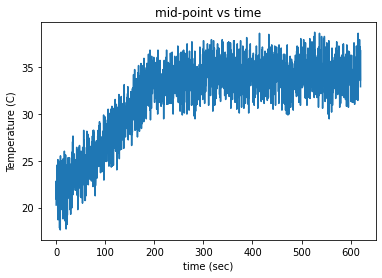

In [4]:
x = df['time']
y = df['t2']

plt.plot(x, y)

plt.xlabel('time (sec)')
plt.ylabel('Temperature (C)')
plt.title('mid-point vs time')

plt.show()

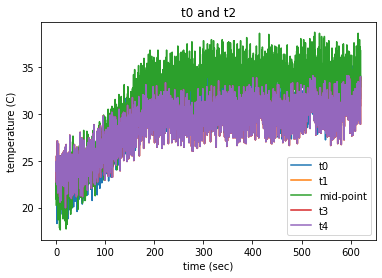

In [5]:
x = df['time']

y0 = df['t0']
y1 = df['t1']
y2 = df['t2']
y3 = df['t3']
y3 = df['t4']


plt.plot(x, y0, label="t0")
plt.plot(x, y1, label="t1")
plt.plot(x, y2, label="mid-point")
plt.plot(x, y1, label="t3")
plt.plot(x, y1, label="t4")

plt.xlabel('time (sec)')
plt.ylabel('temperature (C)')
plt.title('t0 and t2')

plt.legend()
plt.show()

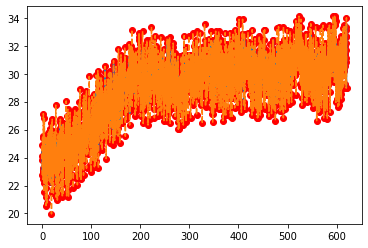

In [6]:
# from scipy import interpolate

# x=np.arange(0,1,1e-3)
# noise=np.random.random(len(x))
# y=2*x+noise


# xnew=np.arange(0,1,1e-1)
f=interpolate.UnivariateSpline(x,y1)
g=interpolate.interp1d(x,y1)
plt.plot(x,y1,'ro',x,f(x),'-',x,g(x),'--')
plt.show()

# Moving Average and Median filter

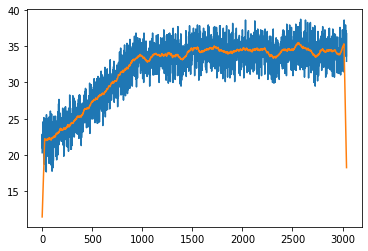

In [7]:
filter_length = 51
t2_moving_average = np.convolve(df['t2'], np.ones((filter_length)), mode='same')
t2_moving_average /= filter_length
plt.plot(df['t2'])
plt.plot(t2_moving_average)

In [8]:
from scipy.signal import medfilt

In [9]:
t2_medfilt = medfilt(df['t2'], filter_length)

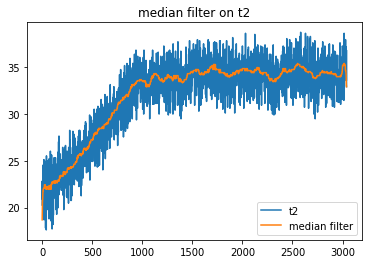

In [10]:
plt.plot(df['t2'],  label="t2")
# plt.plot(t2_moving_average)
plt.plot(t2_medfilt, label='median filter')

plt.title('median filter on t2')
plt.legend()
plt.show()

# Graphing t2 from Average of 5 data points

In [11]:
df

time     t0     t1     t2     t3     t4
0       0.000000  22.44  22.74  20.27  23.34  22.15
1       0.200737  23.14  24.93  22.84  24.63  23.63
2       0.403850  21.16  24.13  21.95  20.96  22.25
3       0.606925  22.64  23.83  20.86  21.85  21.16
4       0.809971  23.34  25.53  22.44  21.46  22.05
...          ...    ...    ...    ...    ...    ...
3036  619.371567  33.04  28.97  37.17  37.40  33.15
3037  619.572111  32.83  32.62  36.07  31.14  27.04
3038  619.770495  31.88  30.83  33.57  29.38  27.95
3039  619.973564  34.11  34.00  36.84  32.62  30.31
3040  620.176603  31.67  28.97  32.93  31.98  30.62

[3041 rows x 6 columns]

In [12]:
# Average of first 5 data points
average = sum(df['t2'].iloc[0:5])/5
print(average)

21.672


In [13]:
# Printing time after the 5 data points
time = df['time'].iloc[4]
print(time)

0.8099710941314697


In [14]:
# Looping through the data set and averaging consecutive 5 data points
sample_size = 20
t2_average_array = [0]
f = 0
i = 0
while f < 3040/sample_size:
    average = sum(df['t2'].iloc[i:i+sample_size])/sample_size
    t2_average_array = np.append(t2_average_array, average)
    i += sample_size
    f+=1

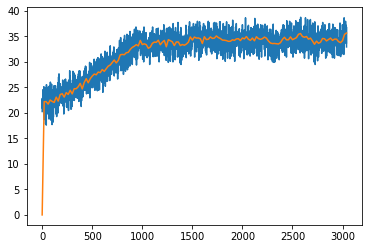

In [15]:
plt.plot(df['t2'])
plt.plot(range(0,3041,sample_size), t2_average_array)

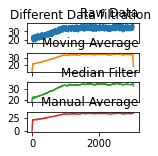

In [87]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(2,2))
fig.suptitle('Different Data filtration')

ax1.plot(df['t2'], label='raw data')
ax1.set_title('Raw Data', loc='right')
ax2.plot(t2_moving_average, 'tab:orange')
ax2.set_title('Moving Average', loc='right')
ax3.plot(t2_medfilt, 'tab:green')
ax3.set_title('Median Filter', loc='right')
ax4.plot(range(0,3041,sample_size), t2_average_array, 'tab:red')
ax4.set_title('Manual Average', loc='right')

# Hiding x labels and tick labels for first 3 plots  
ax1.label_outer()
ax2.label_outer()
ax3.label_outer()

plt.subplots_adjust(hspace=0.5)
# plt.rcParams['figure.figsize'] = [6,4]
plt.show()

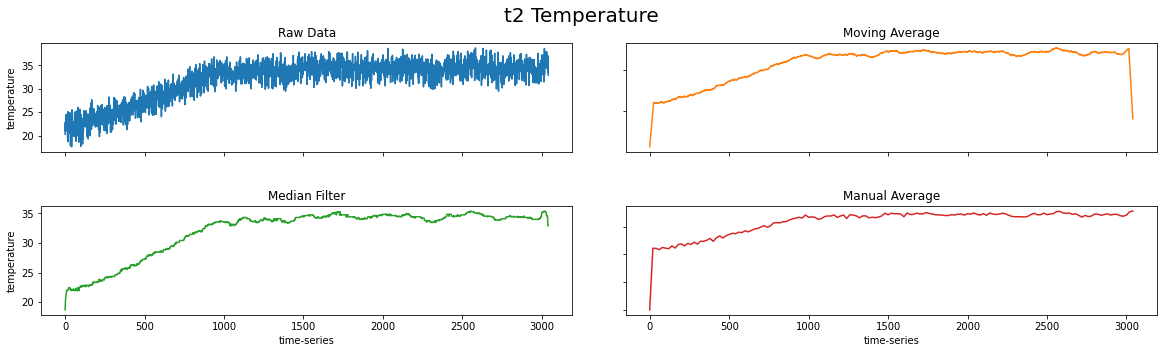

In [19]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(df['t2'])
axs[0, 0].set_title('Raw Data')

axs[0, 1].plot(t2_moving_average, 'tab:orange')
axs[0, 1].set_title('Moving Average')

axs[1, 0].plot(t2_medfilt, 'tab:green')
axs[1, 0].set_title('Median Filter')

axs[1, 1].plot(range(0,3041,sample_size), t2_average_array, 'tab:red')
axs[1, 1].set_title('Manual Average')

for ax in axs.flat:
    ax.set(xlabel='time-series', ylabel='temperature')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('t2 Temperature', fontsize=20)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.rcParams['figure.figsize'] = [20,5] # alternative not for notebook: plt.figure(figsize=(20,5))
plt.show()

### [Code Explanation Link](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html)

In [22]:
def manual_average(mylist = []):
    sample_size = 20
    average_array = [0]
    f = 0
    i = 0
    while f < 3040/sample_size:
        average = sum(mylist.iloc[i:i+sample_size])/sample_size
        average_array = np.append(average_array, average)
        i += sample_size
        f+=1
    return average_array

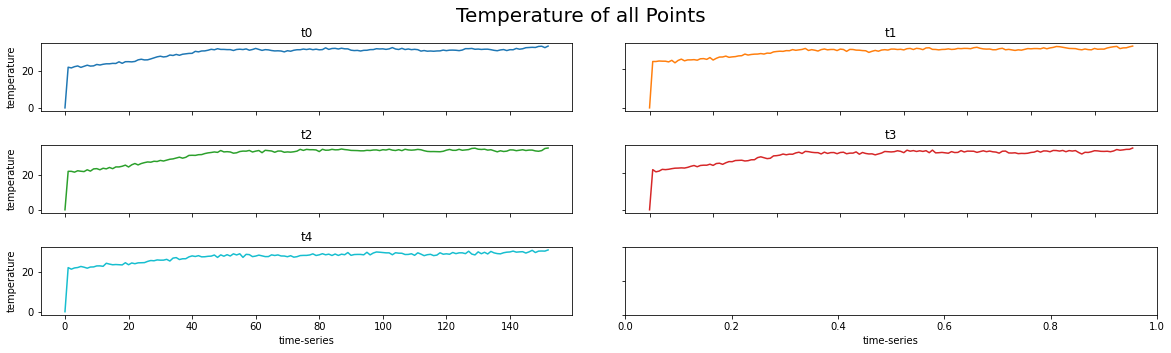

In [23]:
fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(manual_average(df['t0']))
axs[0, 0].set_title('t0')

axs[0, 1].plot(manual_average(df['t1']), 'tab:orange')
axs[0, 1].set_title('t1')

axs[1, 0].plot(manual_average(df['t2']), 'tab:green')
axs[1, 0].set_title('t2')

axs[1, 1].plot(manual_average(df['t3']), 'tab:red')
axs[1, 1].set_title('t3')

axs[2, 0].plot(manual_average(df['t4']), 'tab:cyan')
axs[2, 0].set_title('t4')

for ax in axs.flat:
    ax.set(xlabel='time-series', ylabel='temperature')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Temperature of all Points', fontsize=20)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.rcParams['figure.figsize'] = [20,5] # alternative not for notebook: plt.figure(figsize=(20,5))
plt.show()

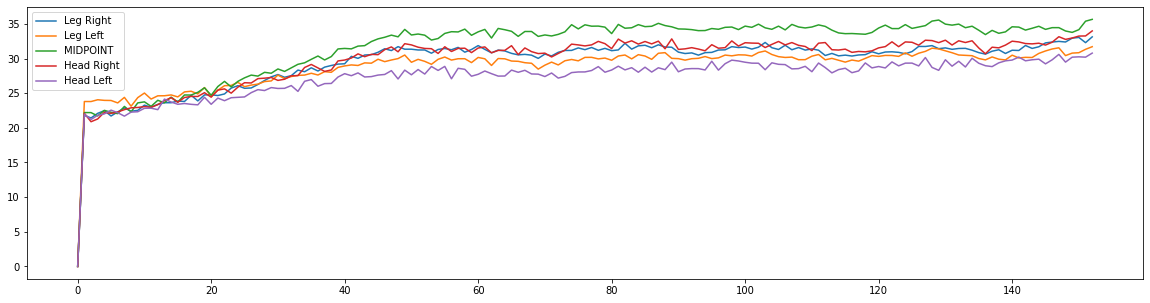

In [24]:
plt.plot(manual_average(df['t0']), label="Leg Right")
plt.plot(manual_average(df['t1']), label="Leg Left")
plt.plot(manual_average(df['t2']), label="MIDPOINT")
plt.plot(manual_average(df['t3']), label="Head Right")
plt.plot(manual_average(df['t4']), label="Head Left")

plt.legend()

From the graph, we can see that the right side is being heated more than the left side. The reason for this is because of the uneveness the strip below the tube.

## Making Heatmap from Temperature Sensors

inverse distance weighing, pathfinder, breadth first search: 
https://developer.disruptive-technologies.com/docs/other/application-notes/generating-a-room-temperature-heatmap

https://medium.com/edyzaiot/heatmap-plots-spatial-interpolation-of-sensor-data-f60a7480f23f

In [82]:
import numpy as np
  
b = np.zeros(2, dtype = int)
print("Matrix b : \n", b)
  
a = np.zeros([2, 2], dtype = int)
print("\nMatrix a : \n", a)
  
c = np.zeros([800, 450])
print("\nMatrix c : \n", c)

c[400,225] = 20

d = c[400,225]
print("\npoint d : \n", d)

Matrix b : 
 [0 0]

Matrix a : 
 [[0 0]
 [0 0]]

Matrix c : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

point d : 
 20.0


In [65]:

x=c

print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


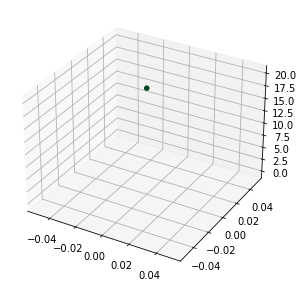

In [81]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.zeros(360000)
y = np.zeros(360000)

ax.scatter3D(x,y,c, c=c, cmap='Greens');

<ipython-input-90-37d07da53d86>:4: RuntimeWarning: invalid value encountered in true_divide
  z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)


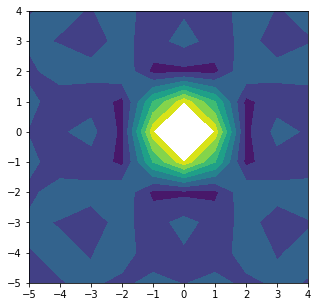

In [90]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
# z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

plt.rcParams['figure.figsize'] = [5,5] # alternative not for notebook: plt.figure(figsize=(20,5))

# h = plt.contourf(x,y,z)

ValueError: x and y must have same first dimension, but have shapes (1, 10) and (10, 1)

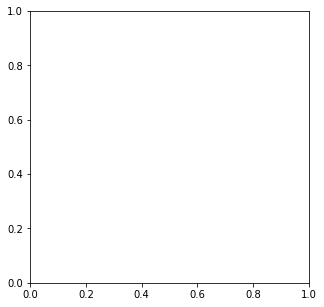

In [93]:


plt.plot(xx,yy, marker='.', color='k', linestyle='none')

In [94]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);

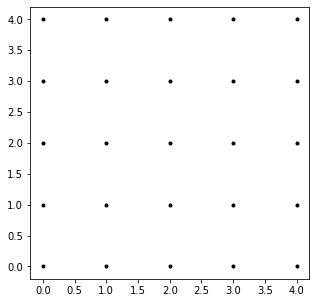

In [96]:
xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

## Input matrix x IDW matrix = output matrix